In [1]:
from IPython.core.display import display,HTML

In [2]:
HTML('''<script>
    hideInput = () => $('div.input').hide();
</script>
<body onload="javascript:hideInput()"></body>''')

In [3]:
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

# Assignment 4

Link to questions - [here](https://docs.google.com/document/d/15C_L4j10rWGvVNzDCmaPNo9yAVsCBEz8PvNRnzydOw0/edit?usp=sharing)

***Student Details:***

- Name : Anjishnu Mukherjee
- Registration Number : B05-511017020
- Class Roll Number : CS Gy-70
- Exam Roll Number : 510517086
- Email : 511017020.anjishnu@students.iiests.ac.in

# Project Setup

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Load libraries, set seed

In [ ]:
%%capture
import platform
import random
import os
import sys
from collections import OrderedDict  
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

def get_lib_versions():
  print("------------------------------------")
  output = OrderedDict()
  output["OS"] = platform.platform()
  output["Python version"] = sys.version.replace("\n", " ")
  output["Numpy version"] = np.version.full_version
  output["Pandas version"] = pd.__version__
  output["Matplotlib version"] = matplotlib.__version__
  output["Seaborn version"] = sns.__version__
  output["Scikitlearn version"] = sklearn.__version__
  for kv in output.items():
    print("%s: %s" % kv)
  print("------------------------------------")

def fix_seeds(seed=1337):
  SEED = seed
  random.seed(SEED)
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  plt.rcParams['figure.figsize'] = (7.0, 7.0) 
  plt.rcParams['figure.dpi'] = 90  
  sns.set_style("dark")
  sns.set_context("paper")
  sns.set_palette("colorblind")
  print("Global Seed : ", SEED)
  print("------------------------------------")

In [ ]:
print("Environment Information : ")
get_lib_versions()
fix_seeds(5 )

Environment Information : 
------------------------------------
OS: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
Numpy version: 1.18.5
Pandas version: 1.0.5
Matplotlib version: 3.2.2
Seaborn version: 0.10.1
Scikitlearn version: 0.22.2.post1
------------------------------------
Global Seed :  5
------------------------------------


In [ ]:
# Utility to plot decision function of SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Titanic dataset

[Link for data](https://www.kaggle.com/heptapod/titanic/version/1#)

## Read data from CSV

In [ ]:
file_path = '/content/drive/My Drive/ML_LAB/Assign_3/titanic/' 
data_path = file_path + 'data.csv'

In [ ]:
print("Let's take a look at the first 5 rows of the dataset.")
df = pd.read_csv(data_path)

# drop rows with nan
df.dropna(axis=0,inplace=True) 
df.head()

Let's take a look at the first 5 rows of the dataset.


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


## Preprocessing

### Rename some columns

In [ ]:
# Renaming column
df.rename(columns={'2urvived': 'Survived'}, inplace=True)

# Dropping irrevelant columns
filter_cols=[col for col in df.columns if col.startswith("zero")]
for zero_col in filter_cols:
  del df[zero_col]

if 'Passengerid' in df.columns:
  del df['Passengerid']

df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       'Survived'],
      dtype='object')

### Min-Max Normalisation

In [ ]:
# Normalization
lst_cols=['Age','Fare']
for col in lst_cols:
  x = df[[col]].values.astype(float) # Returns a numpy array
  scaler = preprocessing.MinMaxScaler()
  x_scaled = scaler.fit_transform(x)
  df[col] = pd.DataFrame(x_scaled)

df.dropna(axis=0,inplace=True)
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,0.273456,0.014151,0,1,0,3,2.0,0
1,0.473882,0.139136,1,1,0,1,0.0,1
2,0.323563,0.015469,1,0,0,3,2.0,1
3,0.436302,0.103644,1,1,0,1,2.0,1
4,0.436302,0.015713,0,0,0,3,2.0,0


## Train:Test split

In [ ]:
# Splitting the dataset
train, test = train_test_split(df,test_size=0.2, random_state=5)

y_train = train[['Survived']]
X_train = train.drop('Survived',axis=1)
print("Train shape: ",X_train.shape,y_train.shape)

y_test = test[['Survived']]
X_test = test.drop('Survived',axis=1)
print("Test shape: ",X_test.shape,y_test.shape)

Train shape:  (1044, 7) (1044, 1)
Test shape:  (261, 7) (261, 1)


## SVM Classifier using following kernels for all features

- Linear
- Polynomial degree = 2
- Polynomial degree = 3
- Polynomial degree = 5
- RBF
- Sigmoid 


In [ ]:
# list to store dictionaries containing accuracies and count of support vectors for each kernel type
clfs_lst = []

### Linear SVM

In [ ]:
svc = SVC(kernel='linear')
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
a_test = accuracy_score(y_test, y_pred_test) 
a_train = accuracy_score(y_train, y_pred_train) 
clfs_lst.append({'Train accuracy':a_train,'Test accuracy':a_test,'Support Vectors\' count':len(clf.support_)})
print("\nLinear")
supports = clf.support_vectors_
print(supports)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])


Linear
[[0.37366905 0.02537431 1.         ... 0.         1.         0.        ]
 [0.42377552 0.02049464 0.         ... 0.         1.         2.        ]
 [0.39872228 0.01546857 1.         ... 0.         3.         0.        ]
 ...
 [0.31103595 0.01493181 0.         ... 0.         3.         2.        ]
 [0.19829638 0.01512699 0.         ... 0.         3.         0.        ]
 [0.58662157 0.10257897 0.         ... 1.         3.         2.        ]]
Support Vectors:
 number of Support Vectors: 549 number of features: 7


### Polynomial SVM, degree = 2

In [ ]:
svc = SVC(kernel='poly', degree=2)
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
a_test = accuracy_score(y_test, y_pred_test) 
a_train = accuracy_score(y_train, y_pred_train) 
clfs_lst.append({'Train accuracy':a_train,'Test accuracy':a_test,'Support Vectors\' count':len(clf.support_)})
print("\nPolynomial SVM. Degree = 2")
supports = clf.support_vectors_
print(supports)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])


Polynomial SVM. Degree = 2
[[0.37366905 0.02537431 1.         ... 0.         1.         0.        ]
 [0.42377552 0.02049464 0.         ... 0.         1.         2.        ]
 [0.33608919 0.01410226 1.         ... 0.         3.         2.        ]
 ...
 [0.31103595 0.01493181 0.         ... 0.         3.         2.        ]
 [0.19829638 0.01512699 0.         ... 0.         3.         0.        ]
 [0.58662157 0.10257897 0.         ... 1.         3.         2.        ]]
Support Vectors:
 number of Support Vectors: 562 number of features: 7


### Polynomial SVM, degree = 3

In [ ]:
svc = SVC(kernel='poly', degree=3)
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
a_test = accuracy_score(y_test, y_pred_test) 
a_train = accuracy_score(y_train, y_pred_train) 
clfs_lst.append({'Train accuracy':a_train,'Test accuracy':a_test,'Support Vectors\' count':len(clf.support_)})
print("\nPolynomial SVM. Degree = 3")
supports = clf.support_vectors_
print(supports)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])


Polynomial SVM. Degree = 3
[[0.37366905 0.02537431 1.         ... 0.         1.         0.        ]
 [0.42377552 0.02049464 0.         ... 0.         1.         2.        ]
 [0.39872228 0.01546857 1.         ... 0.         3.         0.        ]
 ...
 [0.31103595 0.01493181 0.         ... 0.         3.         2.        ]
 [0.19829638 0.01512699 0.         ... 0.         3.         0.        ]
 [0.58662157 0.10257897 0.         ... 1.         3.         2.        ]]
Support Vectors:
 number of Support Vectors: 571 number of features: 7


### Polynomial SVM, degree = 5

In [ ]:
svc = SVC(kernel='poly',degree=5)
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
a_test = accuracy_score(y_test, y_pred_test) 
a_train = accuracy_score(y_train, y_pred_train) 
clfs_lst.append({'Train accuracy':a_train,'Test accuracy':a_test,'Support Vectors\' count':len(clf.support_)})
print("\nPolynomial SVM. Degree = 5")
supports = clf.support_vectors_
print(supports)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])


Polynomial SVM. Degree = 5
[[0.62420143 0.02049464 0.         ... 0.         3.         1.        ]
 [0.37366905 0.02537431 1.         ... 0.         1.         0.        ]
 [0.38619567 0.32179837 0.         ... 0.         2.         2.        ]
 ...
 [0.31103595 0.01493181 0.         ... 0.         3.         2.        ]
 [0.19829638 0.01512699 0.         ... 0.         3.         0.        ]
 [0.58662157 0.10257897 0.         ... 1.         3.         2.        ]]
Support Vectors:
 number of Support Vectors: 562 number of features: 7


### SVM with RBF kernel

In [ ]:
svc = SVC(kernel='rbf')
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
a_test = accuracy_score(y_test, y_pred_test) 
a_train = accuracy_score(y_train, y_pred_train) 
clfs_lst.append({'Train accuracy':a_train,'Test accuracy':a_test,'Support Vectors\' count':len(clf.support_)})
print("\nRBF")
supports = clf.support_vectors_
print(supports)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])


RBF
[[0.37366905 0.02537431 1.         ... 0.         1.         0.        ]
 [0.42377552 0.02049464 0.         ... 0.         1.         2.        ]
 [0.38619567 0.32179837 0.         ... 0.         2.         2.        ]
 ...
 [0.31103595 0.01493181 0.         ... 0.         3.         2.        ]
 [0.19829638 0.01512699 0.         ... 0.         3.         0.        ]
 [0.58662157 0.10257897 0.         ... 1.         3.         2.        ]]
Support Vectors:
 number of Support Vectors: 541 number of features: 7


### Sigmoid SVM

In [ ]:
svc = SVC(kernel='sigmoid')
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
a_test = accuracy_score(y_test, y_pred_test) 
a_train = accuracy_score(y_train, y_pred_train)
clfs_lst.append({'Train accuracy':a_train,'Test accuracy':a_test,'Support Vectors\' count':len(clf.support_)})
print("\nSigmoid")
supports = clf.support_vectors_
print(supports)
print('Support Vectors:\n','number of Support Vectors:', supports.shape[0],'number of features:', supports.shape[1])


Sigmoid
[[0.34861581 0.04231498 0.         ... 0.         3.         0.        ]
 [0.37366905 0.02537431 1.         ... 0.         1.         0.        ]
 [0.42377552 0.02049464 0.         ... 0.         1.         2.        ]
 ...
 [0.27345609 0.01415106 1.         ... 0.         2.         2.        ]
 [0.31103595 0.01493181 0.         ... 0.         3.         2.        ]
 [0.58662157 0.10257897 0.         ... 1.         3.         2.        ]]
Support Vectors:
 number of Support Vectors: 361 number of features: 7


### Tabular Comparison of accuracies and support vector counts for all the above models

In [ ]:
res_table = pd.DataFrame(clfs_lst, index=['Linear','PolyDeg2','PolyDeg3','PolyDeg5','RBF','Sigmoid'])
res_table

,Train accuracy,Test accuracy,Support Vectors' count
Linear,0.750958,0.735632,549
PolyDeg2,0.753831,0.762452,562
PolyDeg3,0.773946,0.804598,571
PolyDeg5,0.783525,0.796935,562
RBF,0.784483,0.823755,541
Sigmoid,0.691571,0.666667,361


## SVM Classifier using following kernels for 2 features

- Linear
- Polynomial degree = 2
- Polynomial degree = 3
- Polynomial degree = 5
- RBF
- Sigmoid 


### Selecting the 2 best features

In [ ]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X_train,y_train)

# Get columns to keep and create a new dataframe with only those.
cols = [0,1]
X_train_new = X_train.iloc[:,cols]
X_test_new = X_test.iloc[:,cols]
print("Considered features: ",X_train_new.columns)

Considered features:  Index(['Age', 'Fare'], dtype='object')


### Linear SVM

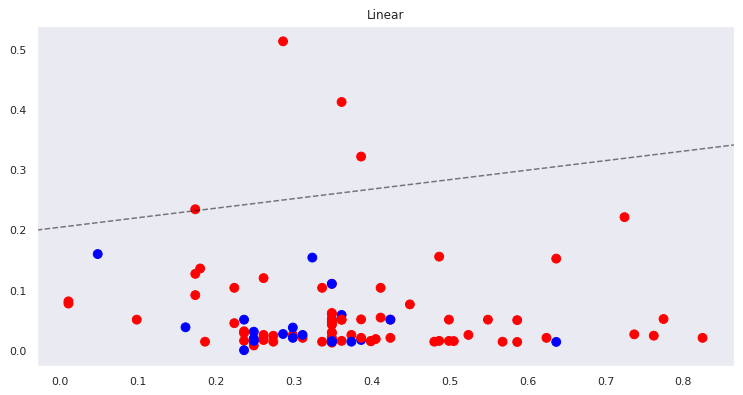

In [ ]:
svc = SVC(kernel='linear')
clf = svc.fit(X_train_new, np.asarray(y_train).reshape(1,-1)[0])
color = ['red' if c == 0 else 'blue' for c in y_train.iloc[:100,0]]
plt.figure(figsize = (10,5))
plt.title('Linear')
plt.scatter(X_train_new.iloc[:100, 0], X_train_new.iloc[:100, 1], c=color, s=50, cmap='autumn')
plot_svc_decision_function(clf)

### Polynomial SVM, degree = 2

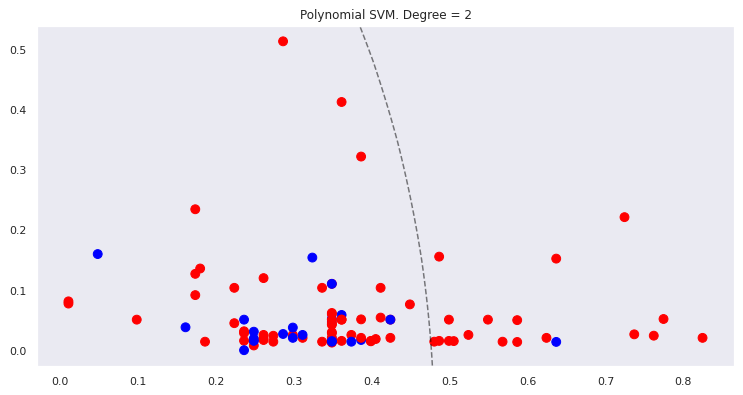

In [ ]:
svc = SVC(kernel='poly', degree=2)
clf = svc.fit(X_train_new, np.asarray(y_train).reshape(1,-1)[0])
color = ['red' if c == 0 else 'blue' for c in y_train.iloc[:100,0]]
plt.figure(figsize = (10,5))
plt.title('Polynomial SVM. Degree = 2')
plt.scatter(X_train_new.iloc[:100, 0], X_train_new.iloc[:100, 1], c=color, s=50, cmap='autumn')
plot_svc_decision_function(clf)

### Polynomial SVM, degree = 3

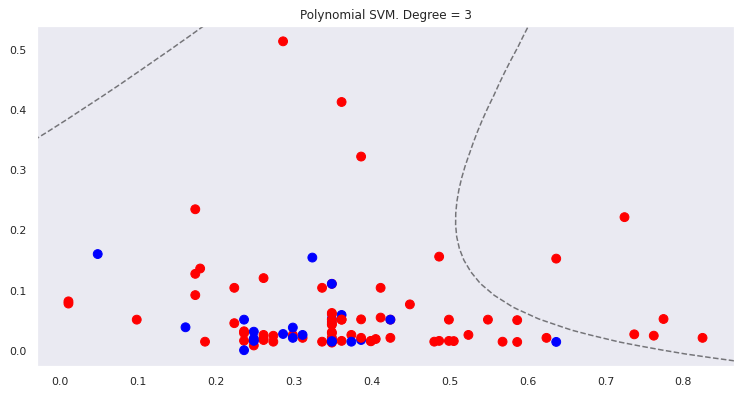

In [ ]:
svc = SVC(kernel='poly', degree=3)
clf = svc.fit(X_train_new, np.asarray(y_train).reshape(1,-1)[0])
color = ['red' if c == 0 else 'blue' for c in y_train.iloc[:100,0]]
plt.figure(figsize = (10,5))
plt.title('Polynomial SVM. Degree = 3')
plt.scatter(X_train_new.iloc[:100, 0], X_train_new.iloc[:100, 1], c=color, s=50, cmap='autumn')
plot_svc_decision_function(clf)

### Polynomial SVM, degree = 5

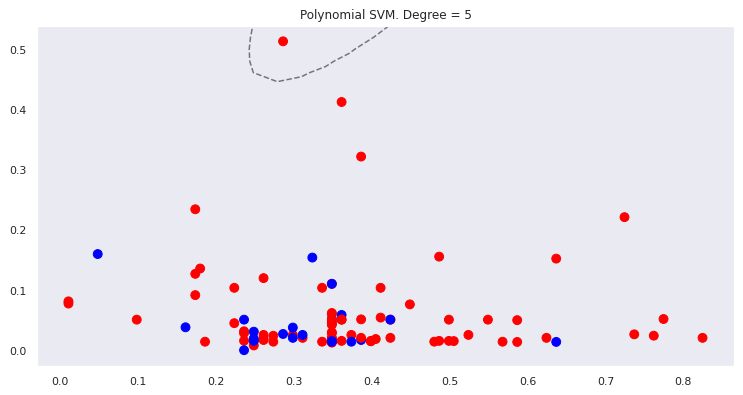

In [ ]:
svc = SVC(kernel='poly', degree=5)
clf = svc.fit(X_train_new, np.asarray(y_train).reshape(1,-1)[0])
color = ['red' if c == 0 else 'blue' for c in y_train.iloc[:100,0]]
plt.figure(figsize = (10,5))
plt.title('Polynomial SVM. Degree = 5')
plt.scatter(X_train_new.iloc[:100, 0], X_train_new.iloc[:100, 1], c=color, s=50, cmap='autumn')
plot_svc_decision_function(clf)

### SVM with RBF kernel

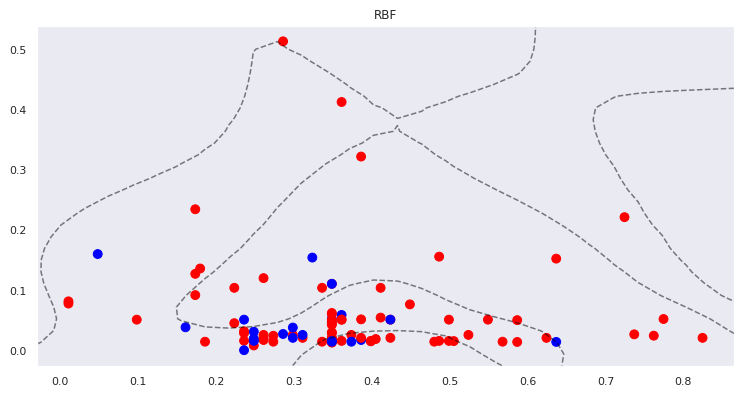

In [ ]:
svc = SVC(kernel='rbf')
clf = svc.fit(X_train_new, np.asarray(y_train).reshape(1,-1)[0])
color = ['red' if c == 0 else 'blue' for c in y_train.iloc[:100,0]]
plt.figure(figsize = (10,5))
plt.title('RBF')
plt.scatter(X_train_new.iloc[:100, 0], X_train_new.iloc[:100, 1], c=color, s=50, cmap='autumn')
plot_svc_decision_function(clf)

### Sigmoid SVM

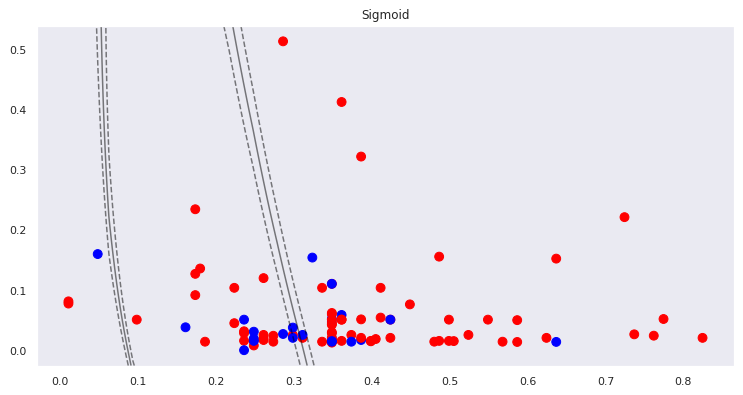

In [ ]:
svc = SVC(kernel='sigmoid')
clf = svc.fit(X_train_new, np.asarray(y_train).reshape(1,-1)[0])
color = ['red' if c == 0 else 'blue' for c in y_train.iloc[:100,0]]
plt.figure(figsize = (10,5))
plt.title('Sigmoid')
plt.scatter(X_train_new.iloc[:100, 0], X_train_new.iloc[:100, 1], c=color, s=50, cmap='autumn')
plot_svc_decision_function(clf)

## SVM using custom kernel for 2 features

### Define and train the custom kernel

- I am using a logarithmic kernel.

In [ ]:
# Custom kernel function
def my_kernel(x, y):
  pow = 7
  dist = euclidean_distances(x,y)
  return -np.log(1+dist**pow)

In [ ]:
svc = SVC(kernel = my_kernel)
clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
custom_train_acc = accuracy_score(y_train, y_pred_train)
custom_test_acc = accuracy_score(y_test, y_pred_test)
print("Custom kernel Train and test accuracy: ", custom_train_acc, custom_test_acc)

Custom kernel Train and test accuracy:  0.710727969348659 0.6781609195402298


### Compare accuracies of all kernels trained with 2 features

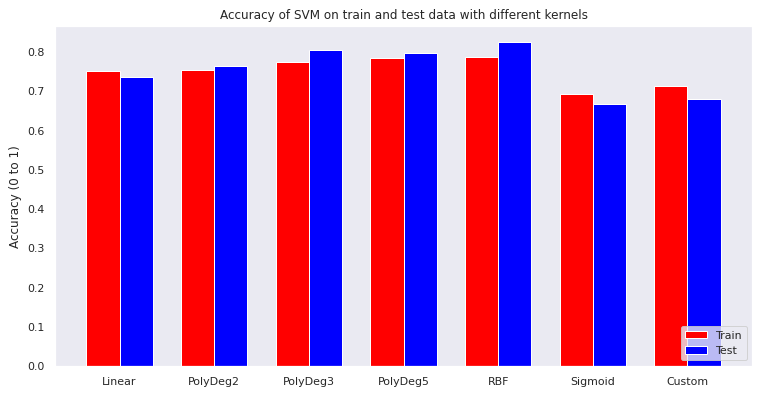

In [ ]:
N = 7  # number of bar groups
train_acc = []
test_acc = []
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# preparing lists for train and test accuracies
for val in clfs_lst:
  train_acc.append(val['Train accuracy'])
  test_acc.append(val['Test accuracy'])
train_acc.append(custom_train_acc)
test_acc.append(custom_test_acc)

# draw bars
rects1 = ax.bar(ind, train_acc, width, color='r')
rects2 = ax.bar(ind + width, test_acc, width, color='b')

# bar chart
ax.set_ylabel('Accuracy (0 to 1)')
ax.set_title("Accuracy of SVM on train and test data with different kernels") 
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Linear', 'PolyDeg2', 'PolyDeg3', 'PolyDeg5', 'RBF','Sigmoid','Custom'))
ax.legend((rects1[0], rects2[0]), ('Train', 'Test'), loc="lower right")

## SVM with RBF kernel - varying control parameter C

- Gamma is kept fixed at the value 0.5


In [ ]:
def getTestAcc(g, lo, hi):
  mid = (lo + hi) / 2
  svc = SVC(kernel='rbf', C=mid, gamma=g)
  clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
  y_pred_test = clf.predict(X_test)
  return accuracy_score(y_test, y_pred_test)
  
def controlledCRBF(lo, hi, count, g):    # g is the fixed gamma value
  train_acc = []
  test_acc = []
  C_vals = []
  iters = 0
  
  # to be calculated
  optimum_C = 0
  max_test_acc = 0

  while lo < hi and count > 0:
    mid = (lo + hi) / 2
    svc = SVC(kernel='rbf', C=mid, gamma=g)
    clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    # accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    C_vals.append(mid)

    # check for maximum test acc
    if acc_test >= max_test_acc:
      max_test_acc = acc_test
      optimum_C = mid

    a_te = getTestAcc(g, lo, mid)
    b_te = getTestAcc(g, mid, hi)
    if a_te >= b_te:
      hi = mid
    else:
      lo = mid

    count-=1
    iters+=1

  return iters, train_acc, test_acc, C_vals, optimum_C, max_test_acc

Optimum C:  0.42969226837158203  for test accuracy:  0.8237547892720306


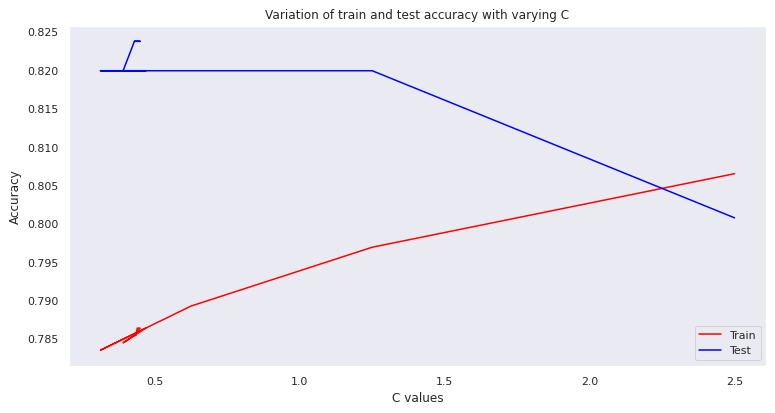

In [ ]:
# call the above function
count, train_acc, test_acc, C_vals, optimum_C, max_test_acc = controlledCRBF(0, 5, 20, 0.5)

# plot accuracies
plt.figure(figsize=(10,5))
plt.title('Variation of train and test accuracy with varying C')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.plot(C_vals,train_acc,c='r')
plt.plot(C_vals,test_acc,c='b')
plt.legend(('Train', 'Test'), loc="lower right")

# Optimum C
print("Optimum C: ", optimum_C, " for test accuracy: ", max_test_acc)

## SVM with RBF kernel - varying control parameter Gamma

- C is kept fixed at the optimum C value found above.

In [ ]:
def getTestAcc(c, lo, hi):
  mid = (lo + hi) / 2
  svc = SVC(kernel='rbf', C=c, gamma=mid)
  clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
  y_pred_test = clf.predict(X_test)
  return accuracy_score(y_test, y_pred_test)
  
def controlledGammaRBF(lo, hi, count, c):  # c is the fixed C value
  train_acc = []
  test_acc = []
  gamma_vals = []
  iters = 0
  
  # to be calculated
  optimum_gamma = 0
  max_test_acc = 0

  while lo < hi and count > 0:
    mid = (lo + hi) / 2
    svc = SVC(kernel='rbf', C=c, gamma=mid)
    clf = svc.fit(X_train, np.asarray(y_train).reshape(1,-1)[0])
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    # accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    gamma_vals.append(mid)

    # check for maximum test acc
    if acc_test >= max_test_acc:
      max_test_acc = acc_test
      optimum_gamma = mid

    a_te = getTestAcc(c, lo, mid)
    b_te = getTestAcc(c, mid, hi)
    if a_te >= b_te:
      hi = mid
    else:
      lo = mid

    count-=1
    iters+=1

  return iters, train_acc, test_acc, gamma_vals, optimum_gamma, max_test_acc

Optimum Gamma:  0.15625953674316406  for test accuracy:  0.8237547892720306


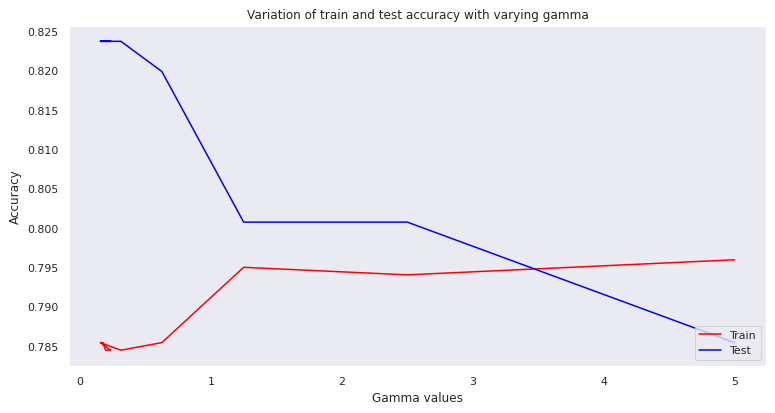

In [ ]:
# call the above function
count, train_acc, test_acc, gamma_vals, optimum_gamma, max_test_acc = controlledGammaRBF(0, 10, 20, optimum_C)

# plot accuracies
plt.figure(figsize = (10,5))
plt.title('Variation of train and test accuracy with varying gamma')
plt.xlabel('Gamma values')
plt.ylabel('Accuracy')
plt.plot(gamma_vals,train_acc,c='r')
plt.plot(gamma_vals,test_acc,c='b')
plt.legend(('Train', 'Test'), loc="lower right")

# Optimum gamma
print("Optimum Gamma: ",optimum_gamma," for test accuracy: ",max_test_acc)

# Forest Cover type Dataset

[Link for Data](https://www.kaggle.com/uciml/forest-cover-type-dataset)

## Read data from CSV

In [ ]:
file_path = '/content/drive/My Drive/ML_LAB/Assign_3/forest_cover_type/' 
data_path = file_path + 'data.csv'

In [ ]:
df1_copy = pd.read_csv(data_path)
df1_copy.dropna(axis=0, inplace=True) # drop rows with nan
print("Let's take a look at the first 5 rows of the dataset.")
df1_copy.head()

Let's take a look at the first 5 rows of the dataset.


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


## Preprocessing

### Choose the first 1000 rows only for the analysis

- Google Colab was unable to process more than this amount of data within a reasonable amount of time [RAM crashes]
- Within the first 1000 rows, (3,4,6,7) class labels are not present [as was observed during analysis made for previous assignment]
- This should not be a problem, because most of the data points are present in the other classes only, and hence this batch is a very good representative sample.

In [ ]:
df1 = df1_copy.copy()
df1 = df1.head(1000)

### Min-Max Normalization

In [ ]:
for col in df1.columns:
  if col == 'Cover_Type':
    continue
  x = df1[[col]].values.astype(float) # Returns a numpy array
  scaler = preprocessing.MinMaxScaler()
  x_scaled = scaler.fit_transform(x)
  df1[col] = pd.DataFrame(x_scaled)

df1.dropna(axis=0, inplace=True) # drop rows with nan
df1.shape

(1000, 55)

## Train:Test:Validation split

In [ ]:
# Splitting the dataset
train, test = train_test_split(df1, test_size=0.2, random_state=5)
test, valid = train_test_split(test, test_size=0.5, random_state=5)

y_train = train[['Cover_Type']]
X_train = train.drop('Cover_Type',axis=1)
print("Train shape: ", X_train.shape, y_train.shape)

y_test = test[['Cover_Type']]
X_test = test.drop('Cover_Type',axis=1)
print("Test shape: ", X_test.shape, y_test.shape)

y_valid = valid[['Cover_Type']]
X_valid = valid.drop('Cover_Type',axis=1)
print("Validation shape: ", X_valid.shape, y_valid.shape)

Train shape:  (800, 54) (800, 1)
Test shape:  (100, 54) (100, 1)
Validation shape:  (100, 54) (100, 1)


## OVR SVM

### Train the classifier

In [ ]:
# multiclass OVR SVM
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)

# prediction
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

### Plot the confusion matrix

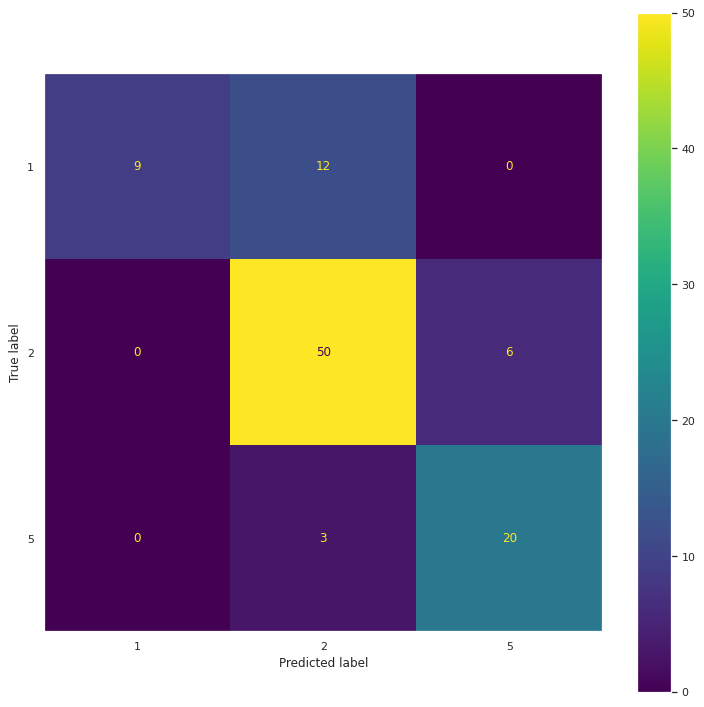

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)

### Compare accuracies for each class label

In [ ]:
# Calculating accuracy for train and test data
# Get the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train, labels=[1,2,3,4,5,6,7])
# normalize the diagonal entries
cm1 = cm1.astype('float')/cm1.sum(axis=1)[:,np.newaxis]
# the diagonal entries are the accuracies of each class
train_acc = cm1.diagonal()

# Get the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_test, labels=[1,2,3,4,5,6,7])
# normalize the diagonal entries
cm2 = cm2.astype('float')/cm2.sum(axis=1)[:,np.newaxis]
# the diagonal entries are the accuracies of each class
test_acc = cm2.diagonal()

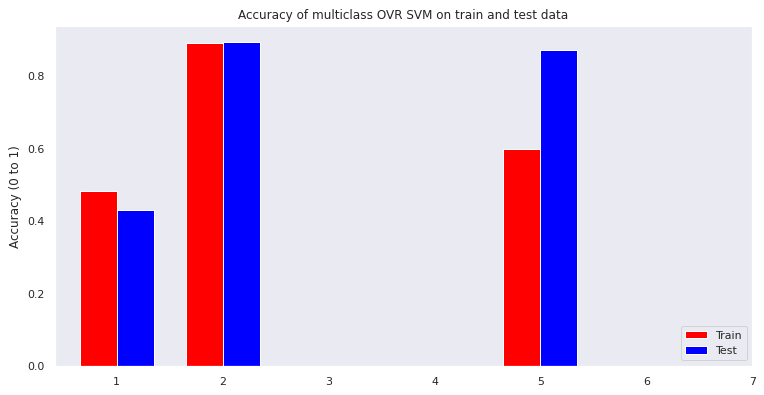

In [ ]:
N = 7  # number of bar groups (K => number of class labels)
ind1 = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# draw bars
rects1 = ax.bar(ind1, train_acc, width, color='r')
rects2 = ax.bar(ind1 + width, test_acc, width, color='b')
ax.set_ylabel('Accuracy (0 to 1)')
ax.set_title("Accuracy of multiclass OVR SVM on train and test data") 
ax.set_xticks(ind1 + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7'))
ax.legend((rects1[0], rects2[0]), ('Train', 'Test'), loc="lower right")

## OVO SVM

### Train the classifier

In [ ]:
# multiclass OVO SVM
clf = OneVsOneClassifier(SVC()).fit(X_train, y_train)

# prediction
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

### Plot the confusion matrix

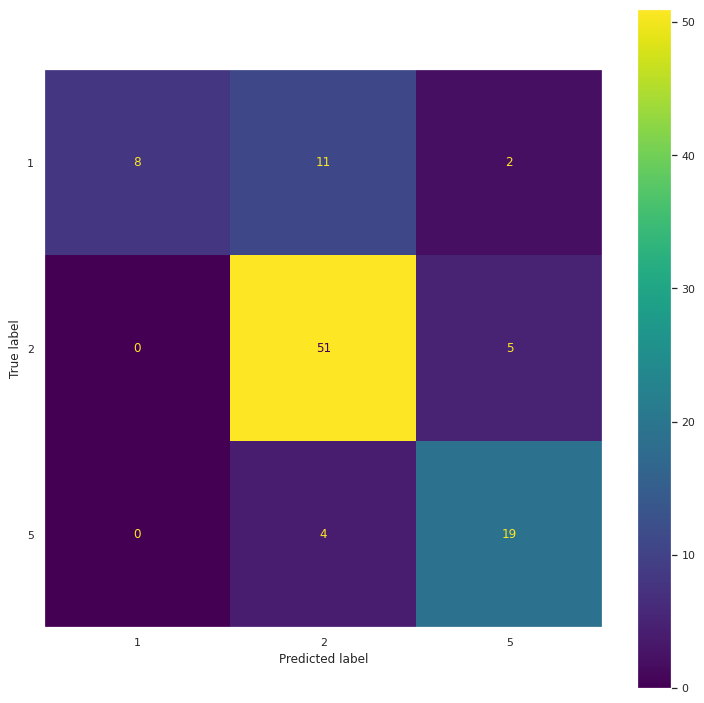

In [ ]:
# confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)

### Compare accuracies for each class label

In [ ]:
# Calculating accuracy for train and test data
# Get the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_train, labels=[1,2,3,4,5,6,7])
# normalize the diagonal entries
cm1 = cm1.astype('float')/cm1.sum(axis=1)[:,np.newaxis]
# the diagonal entries are the accuracies of each class
train_acc = cm1.diagonal()

# Get the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_test, labels=[1,2,3,4,5,6,7])
# normalize the diagonal entries
cm2 = cm2.astype('float')/cm2.sum(axis=1)[:,np.newaxis]
# the diagonal entries are the accuracies of each class
test_acc = cm2.diagonal()

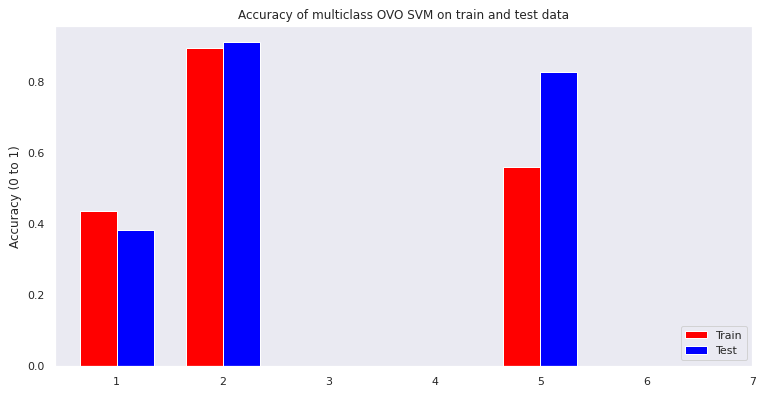

In [ ]:
N = 7  # number of bar groups (K => number of class labels)
ind1 = np.arange(N)  # the x locations for the groups
width = 0.35         # the width of the bars
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# draw bars
rects1 = ax.bar(ind1, train_acc, width, color='r')
rects2 = ax.bar(ind1 + width, test_acc, width, color='b')
ax.set_ylabel('Accuracy (0 to 1)')
ax.set_title("Accuracy of multiclass OVO SVM on train and test data") 
ax.set_xticks(ind1 + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7'))
ax.legend((rects1[0], rects2[0]), ('Train', 'Test'), loc="lower right")